In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('вариант4.My_var.csv', sep =';', header = 0, index_col=False) 

In [33]:
data

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,148.0,13,М,505.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0
1,2.0,147.0,11,М,328.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0
2,3.0,111.0,11,М,330.0,---+---+-+-------------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0
3,4.0,140.0,11,М,328.0,---+---------++--------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0
4,5.0,148.0,11,М,328.0,----+---------+-----+--,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
137,138.0,147.0,11,М,333.0,+++++++++++++++++++++++,3(3)2(2)2(3)4(4),NaN,34.0,97.0,40.0
138,139.0,140.0,11,М,329.0,+++++++++++++++++++-+++,3(3)2(2)3(3)4(4),NaN,34.0,97.0,40.0
139,140.0,148.0,11,Ж,332.0,-++++++++++++++++++++++,3(3)2(2)3(3)4(4),NaN,34.0,97.0,40.0
140,141.0,148.0,11,М,329.0,+++++++++++++++++++++++,3(3)2(2)3(3)4(4),NaN,35.0,100.0,40.0


In [34]:
data = data.dropna(how = 'all')
data

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,148.0,13,М,505.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0
1,2.0,147.0,11,М,328.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0
2,3.0,111.0,11,М,330.0,---+---+-+-------------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0
3,4.0,140.0,11,М,328.0,---+---------++--------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0
4,5.0,148.0,11,М,328.0,----+---------+-----+--,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
136,137.0,148.0,11,Ж,328.0,+++++++++++++++++++--++,3(3)2(2)3(3)4(4),NaN,33.0,94.0,40.0
137,138.0,147.0,11,М,333.0,+++++++++++++++++++++++,3(3)2(2)2(3)4(4),NaN,34.0,97.0,40.0
138,139.0,140.0,11,М,329.0,+++++++++++++++++++-+++,3(3)2(2)3(3)4(4),NaN,34.0,97.0,40.0
139,140.0,148.0,11,Ж,332.0,-++++++++++++++++++++++,3(3)2(2)3(3)4(4),NaN,34.0,97.0,40.0


In [6]:
data['Балл'].describe()

count    141.000000
mean      60.780142
std       19.419832
min        0.000000
25%       50.000000
50%       64.000000
75%       75.000000
max      100.000000
Name: Балл, dtype: float64


# Процент учащихся, выполнивших работу ниже среднего

In [7]:
people_mean = data[data['Балл'] < data['Балл'].mean()]['№'].count()
percent_1 = round(people_mean / len(data.index) * 100, 3)
print("Процент учащихся, выполнивших работу ниже среднего = ", percent_1, '%')

Процент учащихся, выполнивших работу ниже среднего =  46.099 %



# Процент учащихся не сдавших экзамен 

In [8]:
data[data['Балл'] < data['Минимальный балл']]['№'].count()
percent_2 = round(data[data['Балл'] < data['Минимальный балл']]['№'].count()/data['№'].count() * 100, 3)
print("Процент учащихся не сдавших экзамен  = ", percent_2, '%')

Процент учащихся не сдавших экзамен  =  11.348 %



# Круговая диаграмма, показывающая распределение сдавших и не сдавших экзамен

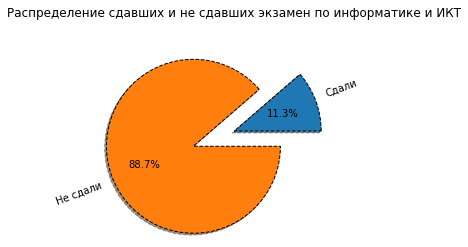

In [9]:
labels = ["Сдали", "Не сдали"]

explode = (0, 0.5)

fig, ax = plt.subplots()

ax.pie([percent_2, 100 - percent_2], 
       labels=labels, 
       autopct='%1.1f%%',
       shadow=True,
       explode=explode, 
       wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, 
       rotatelabels=True)
ax.set_title('Распределение сдавших и не сдавших экзамен по информатике и ИКТ')

fig.savefig('Распределение сдавших и не сдавших экзамен по информатике')
#ax.axis("equal")

# Построение гистограммы по распределению баллов за экзамен

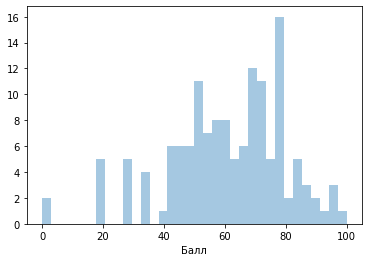

In [70]:
sns.distplot(a=data['Балл'], hist=True, kde=False, rug=False, bins = len(data.groupby(['Балл'])))

Исходя из построенной диаграммы, можно сделать вывод, что распределение баллов за ЕГЭ по информатике является НЕ НОРМАЛЬНЫМ распределением

In [11]:
import scipy.stats as st 

st, p = st.shapiro(data['Балл'])

alpha = 0.05
if p > alpha:
    print('Распределение баллов за экзамен является нормальным')
else:
    print('Распределение баллов за экзамен НЕ является нормальным')
    
print("Статистика критерия Шапиро-Уилка = {}, \nP_value = {}".format(round(st, 3), round(p, 3)))

Распределение баллов за экзамен НЕ является нормальным
Статистика критерия Шапиро-Уилка = 0.971, 
P_value = 0.004


# Ядерная оценка плотности распределению баллов за экзамен

In [1]:
sns.distplot(a=data['Балл'], hist=False, kde=True, rug=False,
            kde_kws={"color": "r", "alpha": 1, "linewidth": 4, "shade":False })

NameError: name 'sns' is not defined

# Процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

In [13]:
fine = data[data['Балл'] > 85]['№'].count()/len(data.index)*100
good = data[(data['Балл'] <= 85) & (data['Балл'] >= 70)]['№'].count()/len(data.index)*100
satis = len(data[(data['Балл'] < 70) & (data['Балл'] >= 50)].index)/len(data.index)*100
not_satis = 100 - (fine + good + satis)
marks = [fine, good, satis, not_satis]

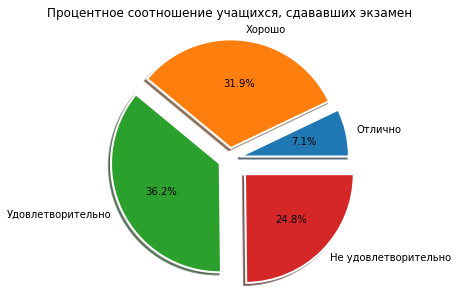

In [14]:
labels = ["Отлично", "Хорошо", "Удовлетворительно", "Не удовлетворительно"]

explode = (0.1, 0.1, 0.1, 0.2)

fig, ax = plt.subplots(figsize = (5, 5))

ax.pie(marks, 
       labels=labels, 
       autopct='%1.1f%%',
       shadow=True,
       explode=explode, 
       wedgeprops={'lw':2, 'ls':'-','edgecolor':"w"}, 
       rotatelabels=False)


ax.set_title('Процентное соотношение учащихся, сдававших экзамен')

fig.savefig('Процентное соотношение учащихся, сдававших экзамен')

# «Ящиковые диаграммы», сравнивающие балы учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

In [15]:
def marks(Ser):
    sp = list()
    for m in Ser:
        if m < 50:
            sp.append('Не удовлетворительно')
        elif m>=50 and m < 70:
            sp.append('Удовлетворительно')
        elif m>=70 and m <= 85:
            sp.append('Хорошо')
        else:
            sp.append('Отлично')
    return sp    
    
data['Оценка'] = marks(data['Балл']) 
data
#data['Оценка'] = data[data['Балл'] > 85]['№']

<ipython-input-15-8c143c429b9a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Оценка'] = marks(data['Балл'])


,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Оценка
0,1.0,148.0,13,М,505.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0,Не удовлетворительно
1,2.0,147.0,11,М,328.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0,Не удовлетворительно
2,3.0,111.0,11,М,330.0,---+---+-+-------------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
3,4.0,140.0,11,М,328.0,---+---------++--------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
4,5.0,148.0,11,М,328.0,----+---------+-----+--,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
...,...,...,...,...,...,...,...,...,...,...,...,...
136,137.0,148.0,11,Ж,328.0,+++++++++++++++++++--++,3(3)2(2)3(3)4(4),NaN,33.0,94.0,40.0,Отлично
137,138.0,147.0,11,М,333.0,+++++++++++++++++++++++,3(3)2(2)2(3)4(4),NaN,34.0,97.0,40.0,Отлично
138,139.0,140.0,11,М,329.0,+++++++++++++++++++-+++,3(3)2(2)3(3)4(4),NaN,34.0,97.0,40.0,Отлично
139,140.0,148.0,11,Ж,332.0,-++++++++++++++++++++++,3(3)2(2)3(3)4(4),NaN,34.0,97.0,40.0,Отлично


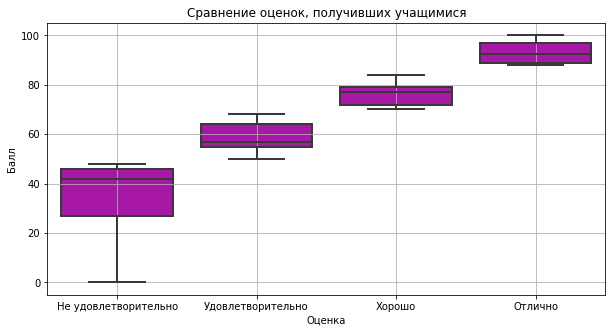

In [16]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Оценка", y="Балл", data=data, color = 'm', linewidth=2)
plt.title('Сравнение оценок, получивших учащимися')
plt.grid(True)

# Процентное соотношение юношей и девушек, писавших экзамен

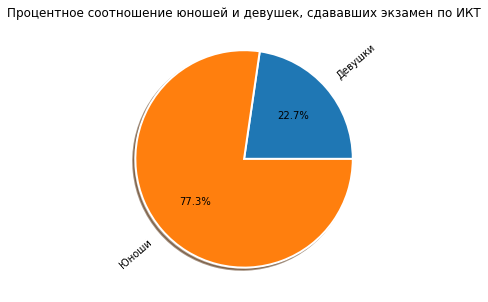

In [17]:
df = data.groupby('Пол').size()
girls = df['Ж']/sum(df)*100
mens = df['М']/sum(df)*100

fig, ax = plt.subplots(figsize = (5, 5))

ax.pie([girls, mens], 
       labels= ['Девушки', 'Юноши'], 
       autopct='%1.1f%%',
       shadow=True,
       #explode=explode, 
       wedgeprops={'lw':2, 'ls':'-','edgecolor':"w"}, 
       rotatelabels=True)


ax.set_title('Процентное соотношение юношей и девушек, сдававших экзамен по ИКТ')
ax.get_figure().suptitle('') #исправление наезжающих заголовков

fig.savefig('Процентное соотношение юношей и девушек, сдававших экзамен по ИКТ')

Text(0.9, 13, '22.7%')

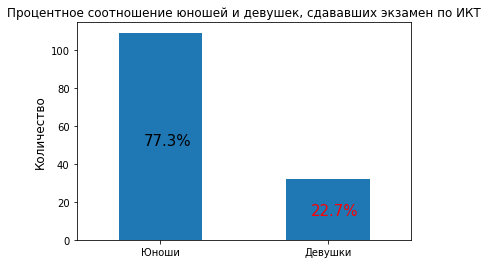

In [88]:
# Строим картинку
data['Пол'].value_counts().plot(kind='bar')

# Добавляем подпись
plt.title(u'Процентное соотношение юношей и девушек, сдававших экзамен по ИКТ')
plt.xticks([0, 1], ['Юноши', 'Девушки'], rotation=None)
plt.ylabel('Количество', fontsize = 12)
plt.text(-0.1, 50, 
         str(round(data['Пол'].value_counts()['М']/sum(df)*100, 2)) + '%', 
         fontsize=15, 
         color='k')
plt.text(0.9, 13, 
         str(round(data['Пол'].value_counts()['Ж']/sum(df)*100, 2)) + '%', 
         fontsize=15, 
         color='r')

# Диаграмма рассеивания, позволяющую увидеть средние баллы девушек и юношей

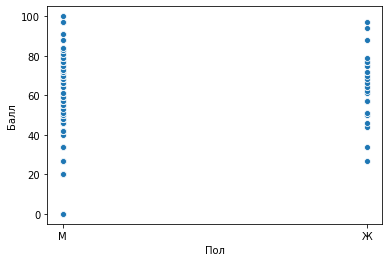

In [47]:
sns.scatterplot(x = 'Пол', y = 'Балл', data=data)

In [51]:
dt_man = data[data['Пол'] == 'М']['Балл']
dt_g = data[data['Пол'] == 'Ж']['Балл']

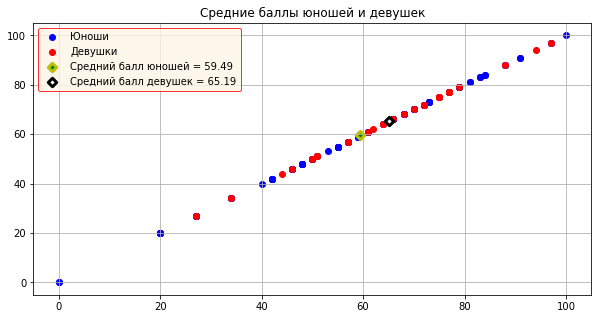

In [52]:
plt.figure(figsize=(10, 5))
plt.scatter(list(dt_man), list(dt_man), color = 'b', label = "Юноши")
plt.scatter(list(dt_g), list(dt_g), color = 'r', label = "Девушки")
plt.scatter(data[data['Пол'] == 'М']['Балл'].mean(),
            data[data['Пол'] == 'М']['Балл'].mean(),
            color = 'g',
            linewidths = 3,
            marker = "D",
            edgecolors = "y",
            label = "Средний балл юношей = " + str(round(data[data['Пол'] == 'М']['Балл'].mean(), 2)))
plt.scatter(data[data['Пол'] == 'Ж']['Балл'].mean(),
            data[data['Пол'] == 'Ж']['Балл'].mean(),
            color = 'w',
            linewidths = 3,
            marker = "D",
            edgecolors = "k",
            label = "Средний балл девушек = " + str(round(data[data['Пол'] == 'Ж']['Балл'].mean(), 2)))
plt.title(u'Средние баллы юношей и девушек')
plt.grid(True)
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper left')

In [39]:
from matplotlib.lines import Line2D

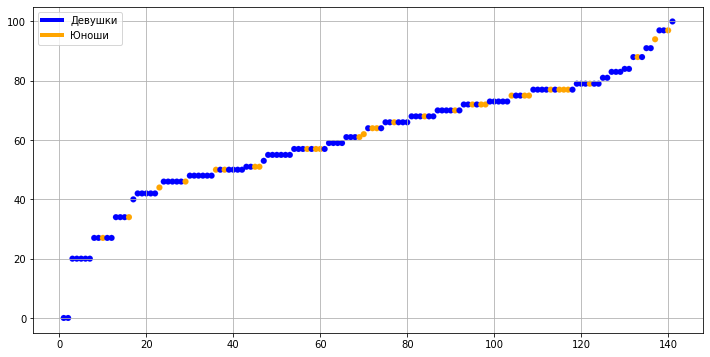

In [46]:
plt.figure(figsize=(12, 6))
plt.scatter(data['№'],
            data['Балл'],
            linewidths = 0.1,
            color = data['Пол'].replace({'М': 'b', 'Ж': 'orange'}),
            label = {'М':'Юноши', 'Ж':'Девушки'})
plt.grid(True)
plt.legend([Line2D([0], [0], color = 'blue', lw = 4), 
               Line2D([0], [0], color = 'orange', lw = 4)], ['Девушки', 'Юноши'])

#data.plot.scatter(x = '№', y = 'Балл', c = data['Пол'].replace({'М': 'b', 'Ж': 'y'}))

# Количество школ принимавших участие

In [20]:
print('Количество школ, принимавших участие в экамзене = {}'.format(len(data.groupby('№ школы')["№"])))

Количество школ, принимавших участие в экамзене = 10


In [21]:
'Количество школ, принимавших участие в экамзене = {}'.format(len(set(data['№ школы'])))

'Количество школ, принимавших участие в экамзене = 10'

# Диаграмма, позволяющая сравнить средние баллы за экзамен по школам.

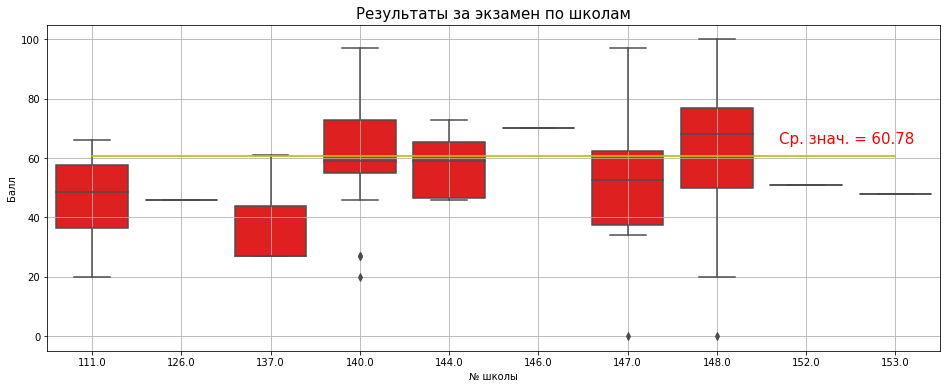

In [134]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="№ школы", y="Балл", data=data, color = 'r')
plt.plot([data['Балл'].mean() for i in range(len(data.groupby('№ школы')["№"]))], 
         marker='', 
         linewidth=1.9, 
         alpha=0.9,
         color = 'y') #Среднее значение
plt.text(7.7, 65, 
         'Ср. знач. = ' + str(round(data['Балл'].mean(), 2)), 
         fontsize=15, 
         color='r')

plt.title('Результаты за экзамен по школам', fontsize = 15)
plt.grid(True)

Выьросы наблюдаются у школ №140, №147, №148

In [62]:
dg = pd.DataFrame()
dg['Средний балл'] = data.groupby('№ школы')['Балл'].mean()
dg['№ Школы'] = dg.index
dg

,Средний балл,№ Школы
№ школы,,
111.0,45.750000,111.0
126.0,46.000000,126.0
137.0,38.333333,137.0
140.0,60.857143,140.0
144.0,57.500000,144.0
146.0,70.000000,146.0
147.0,50.000000,147.0
148.0,63.483871,148.0
152.0,51.000000,152.0


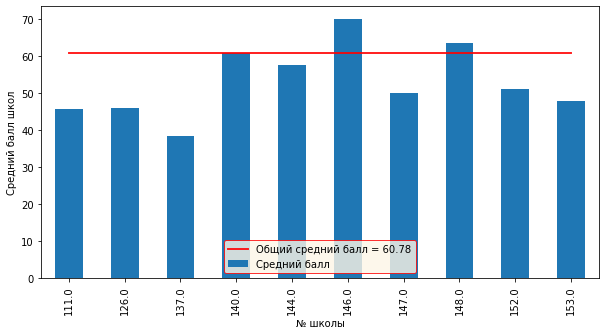

In [329]:
plt.figure(figsize = (10, 5))
dg['Средний балл'].plot(kind='bar')
plt.plot([data['Балл'].mean() for i in range(len(data.groupby('№ школы')))], 
         marker='', 
         linewidth=1.9, 
         alpha=0.9,
         color = 'r',
         label = 'Общий средний балл = ' + str(round(data['Балл'].mean(), 2)))

plt.ylabel('Средний балл школ')
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'lower center')

In [262]:
data

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Оценка
0,1.0,148.0,13,М,505.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0,Не удовлетворительно
1,2.0,147.0,11,М,328.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0,Не удовлетворительно
2,3.0,111.0,11,М,330.0,---+---+-+-------------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
3,4.0,140.0,11,М,328.0,---+---------++--------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
4,5.0,148.0,11,М,328.0,----+---------+-----+--,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
...,...,...,...,...,...,...,...,...,...,...,...,...
136,137.0,148.0,11,Ж,328.0,+++++++++++++++++++--++,3(3)2(2)3(3)4(4),NaN,33.0,94.0,40.0,Отлично
137,138.0,147.0,11,М,333.0,+++++++++++++++++++++++,3(3)2(2)2(3)4(4),NaN,34.0,97.0,40.0,Отлично
138,139.0,140.0,11,М,329.0,+++++++++++++++++++-+++,3(3)2(2)3(3)4(4),NaN,34.0,97.0,40.0,Отлично
139,140.0,148.0,11,Ж,332.0,-++++++++++++++++++++++,3(3)2(2)3(3)4(4),NaN,34.0,97.0,40.0,Отлично


# Количество заданий с кратким ответом

In [275]:
print("Заданий с кратким ответом = {}".format(len(data['Задания с кратким ответом'].iloc[0])))

Заданий с кратким ответом = 23


In [276]:
k = 1
data['Задания с развёрнутым ответом'].iloc[0].split('(')
for i in data['Задания с развёрнутым ответом'].iloc[0].split('(')[:-1]:
    if ')' in i:
        k += 1
print('Задания с развёрнутым ответом = {}'.format(k))

Задания с развёрнутым ответом = 4


# 2.	Процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [10]:
def zad_B(sp):
    bal = [0 for i in range(len(sp.iloc[0]))]
    for stud in sp:
        for ind, z in enumerate(stud):
            if z == '+':
                bal[ind] += 1
    return(bal)

In [15]:
Z_B = zad_B(data['Задания с кратким ответом'])
tab = pd.DataFrame()
tab['Задание'] = ['B' + str(i+1) for i in range(len(data['Задания с кратким ответом'].iloc[0]))]
tab['Балл'] = Z_B
tab['Выполненный %'] = round(tab['Балл']/len(data.index)*100, 2)
tab['Не выполненный %'] = 100 - tab['Выполненный %']
tab

,Задание,Балл,Выполненный %,Не выполненный %
0,B1,115,81.56,18.44
1,B2,86,60.99,39.01
2,B3,112,79.43,20.57
3,B4,111,78.72,21.28
4,B5,96,68.09,31.91
5,B6,87,61.70,38.30
6,B7,130,92.20,7.80
7,B8,122,86.52,13.48
8,B9,70,49.65,50.35
9,B10,84,59.57,40.43


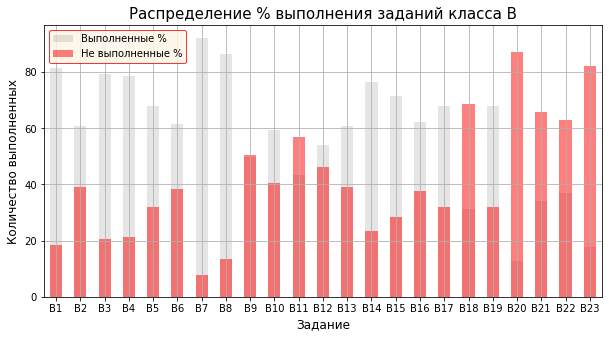

In [35]:
plt.figure(figsize = (10, 5))
tab['Выполненный %'].plot(kind='bar', color = 'k', alpha = 0.1, label = 'Выполненные %')
tab['Не выполненный %'].plot(kind='bar', color = 'r', alpha = 0.5, label = 'Не выполненные %')
plt.xticks([i for i in range(len(tab.index))], tab['Задание'], rotation=None)
plt.ylabel('Количество выполненных', fontsize = 12)
plt.xlabel('Задание', fontsize = 12)
plt.title('Распределение % выполнения заданий класса B', fontsize = 15)
plt.grid(True)
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper left')

Text(0.5, 1.0, 'Распределение % выполнения заданий класса B')

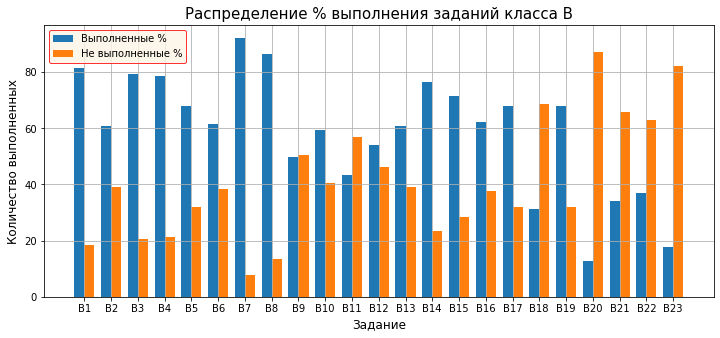

In [34]:
plt.figure(figsize = (12, 5))
plt.bar(tab['Задание'], tab['Выполненный %'], width = -(0.75 / 2), align='edge', label = 'Выполненные %')
plt.bar(tab['Задание'], tab['Не выполненный %'], width = (0.75 / 2), align='edge', label = 'Не выполненные %')
plt.grid(True)
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper left')
plt.ylabel('Количество выполненных', fontsize = 12)
plt.xlabel('Задание', fontsize = 12)
plt.title('Распределение % выполнения заданий класса B', fontsize = 15)

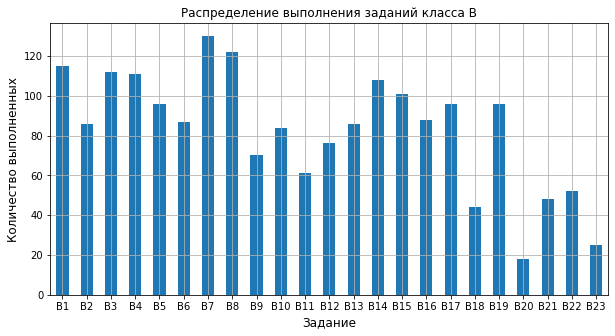

In [36]:
plt.figure(figsize = (10, 5))
tab['Балл'].plot(kind='bar')
plt.xticks([i for i in range(len(tab.index))], tab['Задание'], rotation=None)
plt.ylabel('Количество выполненных', fontsize = 12)
plt.xlabel('Задание', fontsize = 12)
plt.title('Распределение выполнения заданий класса B')
plt.grid(True)

Из гистограммы заметно, что задание B20 мало, кто выполняют. Напротив, задание B7 выполняют большинство выпускников.
К тому же распределение правильно выполненных заданий не является нормальным

# Процент выполненных заданий для типа С

In [43]:
def zad(sp):
    bal = [0, 0, 0, 0]
    for num in sp:
        k = num.split('(')
        
        for ind, j in enumerate(k[:-1]):
            if ind == 0 or ind == 2:
                if int(j[-1]) == 3: 
                    bal[ind] += 1
            elif ind == 1:
                if int(j[-1]) == 2:
                    bal[ind] += 1
            else:
                if int(j[-1]) == 3:
                    bal[ind] += 1
    return(bal)           

In [44]:
rasp = zad(data['Задания с развёрнутым ответом'])

In [46]:
tbl = pd.DataFrame()
tbl['Задание'] = ['С1', 'С2', 'С3', 'С4']
tbl['Балл'] = rasp
tbl['Выполненный %'] = round(tbl['Балл']/len(data.index)*100, 2)
tbl['Не выполненный %'] = 100 - tbl['Выполненный %']
tbl

,Задание,Балл,Выполненный %,Не выполненный %
0,С1,53,37.59,62.41
1,С2,48,34.04,65.96
2,С3,24,17.02,82.98
3,С4,2,1.42,98.58


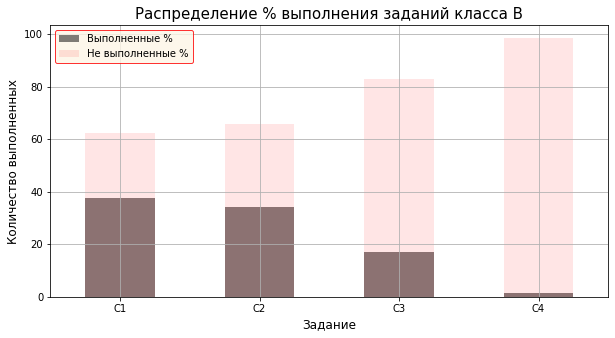

In [50]:
plt.figure(figsize = (10, 5))
tbl['Выполненный %'].plot(kind='bar', color = 'k', alpha = 0.5, label = 'Выполненные %')
tbl['Не выполненный %'].plot(kind='bar', color = 'r', alpha = 0.1, label = 'Не выполненные %')
plt.xticks([i for i in range(len(tbl.index))], tbl['Задание'], rotation=None)
plt.ylabel('Количество выполненных', fontsize = 12)
plt.xlabel('Задание', fontsize = 12)
plt.title('Распределение % выполнения заданий класса B', fontsize = 15)
plt.grid(True)
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper left')

Text(0.5, 1.0, 'Распределение % выполнения заданий класса B')

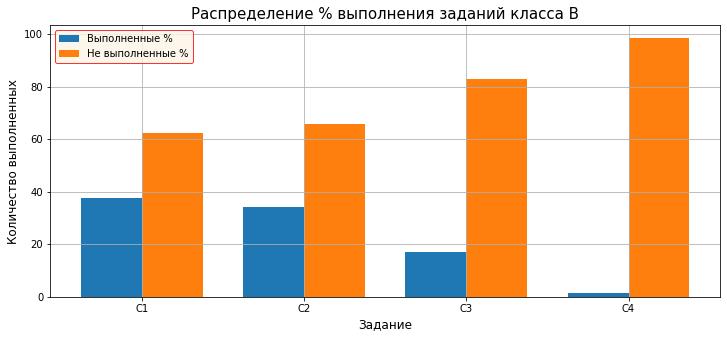

In [52]:
plt.figure(figsize = (12, 5))
plt.bar(tbl['Задание'], tbl['Выполненный %'], width = -(0.75 / 2), align='edge', label = 'Выполненные %')
plt.bar(tbl['Задание'], tbl['Не выполненный %'], width = (0.75 / 2), align='edge', label = 'Не выполненные %')
plt.grid(True)
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper left')
plt.ylabel('Количество выполненных', fontsize = 12)
plt.xlabel('Задание', fontsize = 12)
plt.title('Распределение % выполнения заданий класса B', fontsize = 15)

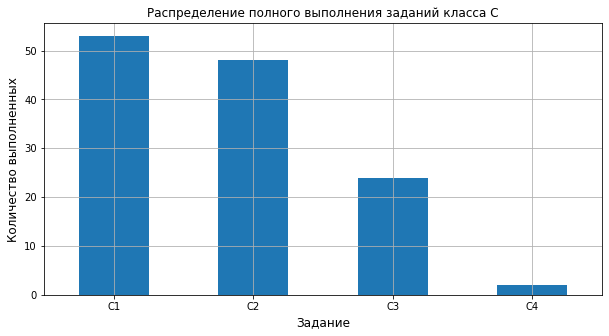

In [48]:
plt.figure(figsize = (10, 5))
tbl['Балл'].plot(kind='bar')
plt.xticks([0, 1, 2, 3], tbl['Задание'], rotation=None)
plt.ylabel('Количество выполненных', fontsize = 12)
plt.xlabel('Задание', fontsize = 12)
plt.title('Распределение полного выполнения заданий класса С')
plt.grid(True)

Из данного графика можно увидеть, что задание С1 выполнялось гораздо чаще. Однако по всем заданиям выделенной категории прослеживается, что их гораздо чаще не выполняют.

# Анализ двух школ
А) по всем выполненным заданиям типа В
Б) по заданиям типа С больше 50%
В) по среднему балу юношей и девушек


In [390]:
data['№ школы'].value_counts(sort = True)

148.0    93
140.0    21
144.0    10
147.0     6
111.0     4
137.0     3
146.0     1
152.0     1
153.0     1
126.0     1
Name: № школы, dtype: int64

In [391]:
sch1 = pd.DataFrame()
sch1 = data[data['№ школы'] == 148]
sch1

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Оценка
0,1.0,148.0,13,М,505.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0,Не удовлетворительно
4,5.0,148.0,11,М,328.0,----+---------+-----+--,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
5,6.0,148.0,11М,М,333.0,-------+-----+--+------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
6,7.0,148.0,11,М,328.0,+-----++---------------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
11,12.0,148.0,11,М,332.0,+----+++---------------,0(3)0(2)0(3)0(4),NaN,4.0,27.0,40.0,Не удовлетворительно
...,...,...,...,...,...,...,...,...,...,...,...,...
134,135.0,148.0,11,М,332.0,++++++++++++++-++++-+++,3(3)1(2)3(3)4(4),NaN,32.0,91.0,40.0,Отлично
135,136.0,148.0,11,М,330.0,+++++++++++++++++++-+++,3(3)2(2)3(3)2(4),NaN,32.0,91.0,40.0,Отлично
136,137.0,148.0,11,Ж,328.0,+++++++++++++++++++--++,3(3)2(2)3(3)4(4),NaN,33.0,94.0,40.0,Отлично
139,140.0,148.0,11,Ж,332.0,-++++++++++++++++++++++,3(3)2(2)3(3)4(4),NaN,34.0,97.0,40.0,Отлично


In [392]:
sch2 = pd.DataFrame()
sch2 = data[data['№ школы'] == 140]
sch2

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Оценка
3,4.0,140.0,11,М,328.0,---+---------++--------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
9,10.0,140.0,11,Ж,330.0,-+----+------+-+-------,0(3)0(2)0(3)0(4),NaN,4.0,27.0,40.0,Не удовлетворительно
10,11.0,140.0,11,М,328.0,+--+--++---------------,0(3)0(2)0(3)0(4),NaN,4.0,27.0,40.0,Не удовлетворительно
26,27.0,140.0,11,М,329.0,+-+-++++---+++---------,0(3)0(2)0(3)0(4),NaN,9.0,46.0,40.0,Не удовлетворительно
30,31.0,140.0,11,М,331.0,+-+++-+++-----+-+------,1(3)0(2)0(3)0(4),NaN,10.0,48.0,40.0,Не удовлетворительно
48,49.0,140.0,11,М,332.0,+++++-++-+-++++-++-----,0(3)0(2)0(3)0(4),NaN,14.0,55.0,40.0,Удовлетворительно
54,55.0,140.0,11,М,333.0,++++++++---+-+-+-++--++,0(3)0(2)0(3)0(4),NaN,15.0,57.0,40.0,Удовлетворительно
55,56.0,140.0,11,М,331.0,+-+++-+++----++-+-+----,2(3)2(2)0(3)0(4),NaN,15.0,57.0,40.0,Удовлетворительно
56,57.0,140.0,11,Ж,332.0,+++---++-++-+++++-+----,2(3)0(2)0(3)0(4),NaN,15.0,57.0,40.0,Удовлетворительно
61,62.0,140.0,11,М,333.0,+++++++++---+++-+------,3(3)0(2)0(3)0(4),NaN,16.0,59.0,40.0,Удовлетворительно


In [406]:
B1 = zad_B(sch1['Задания с кратким ответом'])
tb1 = pd.DataFrame()
tb1['Задание'] = ['B' + str(i+1) for i in range(len(sch1['Задания с кратким ответом'].iloc[0]))]
tb1['Балл'] = B1
tb1['Выполнение %'] = round(tb1['Балл']/len(sch1.index)*100, 2)
tb1

,Задание,Балл,Выполнение %
0,B1,75,80.65
1,B2,58,62.37
2,B3,69,74.19
3,B4,74,79.57
4,B5,66,70.97
5,B6,61,65.59
6,B7,87,93.55
7,B8,82,88.17
8,B9,54,58.06
9,B10,57,61.29


In [404]:
B2 = zad_B(sch2['Задания с кратким ответом'])
tb3 = pd.DataFrame()
tb3['Задание'] = ['B' + str(i+1) for i in range(len(sch2['Задания с кратким ответом'].iloc[0]))]
tb3['Балл'] = B2
tb3['Выполнение %'] = round(tb3['Балл']/len(sch2.index)*100, 2)
tb3

,Задание,Балл,Выполнение %
0,B1,19,90.48
1,B2,13,61.90
2,B3,18,85.71
3,B4,17,80.95
4,B5,17,80.95
5,B6,12,57.14
6,B7,20,95.24
7,B8,18,85.71
8,B9,10,47.62
9,B10,12,57.14


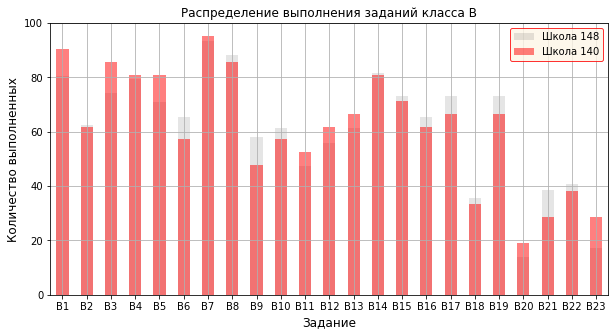

In [414]:
plt.figure(figsize = (10, 5))
tb1['Выполнение %'].plot(kind='bar', color = 'k', alpha = 0.1, label = 'Школа 148')
tb3['Выполнение %'].plot(kind='bar', color = 'r', alpha = 0.5, label = 'Школа 140')
plt.xticks([i for i in range(len(tb1.index))], tb1['Задание'], rotation=None)
plt.ylabel('Количество выполненных', fontsize = 12)
plt.xlabel('Задание', fontsize = 12)
plt.title('Распределение выполнения заданий класса B')
plt.grid(True)
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper right')

Задание категории B ученики обеих школ сдают примерно одинаково

In [448]:
sch3 = pd.DataFrame()
sch3 = data[data['№ школы'] == 148]
sch3

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Оценка
0,1.0,148.0,13,М,505.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0,Не удовлетворительно
4,5.0,148.0,11,М,328.0,----+---------+-----+--,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
5,6.0,148.0,11М,М,333.0,-------+-----+--+------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
6,7.0,148.0,11,М,328.0,+-----++---------------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
11,12.0,148.0,11,М,332.0,+----+++---------------,0(3)0(2)0(3)0(4),NaN,4.0,27.0,40.0,Не удовлетворительно
...,...,...,...,...,...,...,...,...,...,...,...,...
134,135.0,148.0,11,М,332.0,++++++++++++++-++++-+++,3(3)1(2)3(3)4(4),NaN,32.0,91.0,40.0,Отлично
135,136.0,148.0,11,М,330.0,+++++++++++++++++++-+++,3(3)2(2)3(3)2(4),NaN,32.0,91.0,40.0,Отлично
136,137.0,148.0,11,Ж,328.0,+++++++++++++++++++--++,3(3)2(2)3(3)4(4),NaN,33.0,94.0,40.0,Отлично
139,140.0,148.0,11,Ж,332.0,-++++++++++++++++++++++,3(3)2(2)3(3)4(4),NaN,34.0,97.0,40.0,Отлично


In [449]:
def zad_с(sp):
    bal = [0, 0, 0, 0]
    for num in sp:
        k = num.split('(')
        for ind, j in enumerate(k[:-1]):
            if int(j[-1]) != 0:
                bal[ind] += 1
    return(bal)        

In [450]:
c1 = zad_с(sch3['Задания с развёрнутым ответом'])
tb2 = pd.DataFrame()
tb2['Задание'] = ['С1', 'С2', 'С3', 'С4']
tb2['Количкство выполневших'] = c1
tb2['Выполнение %'] = round(tb2['Количкство выполневших']/len(sch3.index)*100, 2)
tb2

,Задание,Количкство выполневших,Выполнение %
0,С1,69,74.19
1,С2,52,55.91
2,С3,62,66.67
3,С4,35,37.63


In [481]:
sch4 = pd.DataFrame()
sch4 = data[data['№ школы'] == 140]
sch4

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Оценка
3,4.0,140.0,11,М,328.0,---+---------++--------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Не удовлетворительно
9,10.0,140.0,11,Ж,330.0,-+----+------+-+-------,0(3)0(2)0(3)0(4),NaN,4.0,27.0,40.0,Не удовлетворительно
10,11.0,140.0,11,М,328.0,+--+--++---------------,0(3)0(2)0(3)0(4),NaN,4.0,27.0,40.0,Не удовлетворительно
26,27.0,140.0,11,М,329.0,+-+-++++---+++---------,0(3)0(2)0(3)0(4),NaN,9.0,46.0,40.0,Не удовлетворительно
30,31.0,140.0,11,М,331.0,+-+++-+++-----+-+------,1(3)0(2)0(3)0(4),NaN,10.0,48.0,40.0,Не удовлетворительно
48,49.0,140.0,11,М,332.0,+++++-++-+-++++-++-----,0(3)0(2)0(3)0(4),NaN,14.0,55.0,40.0,Удовлетворительно
54,55.0,140.0,11,М,333.0,++++++++---+-+-+-++--++,0(3)0(2)0(3)0(4),NaN,15.0,57.0,40.0,Удовлетворительно
55,56.0,140.0,11,М,331.0,+-+++-+++----++-+-+----,2(3)2(2)0(3)0(4),NaN,15.0,57.0,40.0,Удовлетворительно
56,57.0,140.0,11,Ж,332.0,+++---++-++-+++++-+----,2(3)0(2)0(3)0(4),NaN,15.0,57.0,40.0,Удовлетворительно
61,62.0,140.0,11,М,333.0,+++++++++---+++-+------,3(3)0(2)0(3)0(4),NaN,16.0,59.0,40.0,Удовлетворительно


In [482]:
c2 = zad_с(sch4['Задания с развёрнутым ответом'])
tb4 = pd.DataFrame()
tb4['Задание'] = ['С1', 'С2', 'С3', 'С4']
tb4['Количкство выполневших'] = c2
tb4['Выполнение %'] = round(tb4['Количкство выполневших']/len(sch4.index)*100, 2)
tb4

,Задание,Количкство выполневших,Выполнение %
0,С1,14,66.67
1,С2,10,47.62
2,С3,8,38.10
3,С4,5,23.81


In [483]:
tb2

,Задание,Количкство выполневших,Выполнение %
0,С1,69,74.19
1,С2,52,55.91
2,С3,62,66.67
3,С4,35,37.63


В школе 148 задание С1, С2, С3 было выполнено за 50% учащихся, а задание С4 выполнело лишь 37,63% учащихся. 
В школе 140 задание лишь задание С1 было выполнено за 50% учащихся.

In [484]:
g148 = round(sch3[sch3['Пол'] == "Ж"]['Балл'].mean(), 2)
m148 = round(sch3[sch3['Пол'] == 'М']['Балл'].mean(), 2)

In [485]:
g140 = round(sch4[sch4['Пол'] == "Ж"]['Балл'].mean(), 2)
m140 = round(sch4[sch4['Пол'] == 'М']['Балл'].mean(), 2)

In [486]:
print("Школа 148: \n Средний балл девушек = {}; \n Средний балл юношей = {}".format(g148, m148))

Школа 148: 
 Средний балл девушек = 67.52; 
 Средний балл юношей = 61.83


In [487]:
print("Школа 140: \n Средний балл девушек = {}; \n Средний балл юношей = {}".format(g140, m140))

Школа 140: 
 Средний балл девушек = 52.0; 
 Средний балл юношей = 62.33


Средний балл девушек в школе 148 на 15,52 балла выше, чем у девушек из школы 140

Средний балл юношей обеих рассматриваемых школ практически идентичен